In [3]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer
%matplotlib inline  

In [4]:
test_image = skio.imread("images/pupp3.jpg")
training_images = ["images/puppy_b.jpg"]

In [6]:
def get_grayscale(image):
    gray = cv2.cvtColor(image, cv.CV_RGB2GRAY)
    return cv2.merge((gray,gray,gray))

def select_hyperparams(k,pc,actual_image):
    #getting the right featurizer
    f = Featurizer(training_images,k=k,pca_size=pc,num_samples=20000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    #getting the right colorizer
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    gray_test = get_grayscale(actual_image)
    colored_image = colorizer.color_image(gray_test)
    print "K: " + str(k)
    print "PCA Size: " + str(pc)    
    print "********************************"
    skio.imshow(colored_image)
    skio.show()

In [7]:
windowSizes = [5,10,20]
gamma = [1.0/32,1.0/64,1.0/16]
c = [.5,1.5]
#k= [10,15,25]
k = [64,128]
pc = [8,16,20]

Cluster Centers...
[[ 108.14731615  148.99089619]
 [ 136.53966459  153.72564537]
 [ 104.96189824  155.46589094]
 [ 133.31603774  138.75943396]
 [ 142.87304075  163.37513062]
 [ 102.09234332  160.15805471]
 [ 127.8822314   160.9338843 ]
 [ 131.81264406  146.95456042]
 [ 117.04259259  139.70740741]
 [ 120.38767773  154.88246445]
 [ 140.48948463  157.81996765]
 [ 106.79824371  152.0793582 ]
 [ 121.82060391  134.22735346]
 [ 140.8991009   147.56743257]
 [ 134.77356156  151.27593318]
 [ 110.36638984  155.3654128 ]
 [ 104.52520576  164.41615226]
 [ 127.29171669  129.66866747]
 [ 106.08564082  157.56526899]
 [ 135.39971751  160.42231638]
 [ 113.70079435  145.93115622]
 [ 135.25824176  144.94230769]
 [ 101.07635983  168.94979079]
 [ 148.14956522  160.13913043]
 [ 125.60675381  148.52505447]
 [ 144.11809732  155.52050301]
 [ 139.84067447  153.08740537]
 [ 137.75550729  156.48107353]
 [ 102.0973015   157.34327971]
 [ 132.41574074  132.99722222]
 [ 105.06843403  150.91892725]
 [ 146.75878594  167

/home/vashishtm/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:775: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


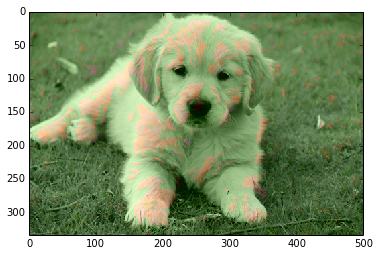

Cluster Centers...
[[ 106.12572666  152.08822524]
 [ 137.94782034  159.5653897 ]
 [ 130.90830189  146.97056604]
 [ 103.62534925  159.54508509]
 [ 120.4184953   135.64576803]
 [ 122.24712042  157.70994764]
 [ 109.2281759   147.92149837]
 [ 133.26606335  149.79517345]
 [ 131.78599222  134.14063369]
 [ 144.94689655  160.65172414]
 [ 135.37737937  151.98052236]
 [ 102.42210021  162.21688401]
 [ 136.03918723  149.47460087]
 [ 131.28809284  142.87840565]
 [ 106.65084075  156.06217324]
 [ 104.22285915  155.45683201]
 [ 116.32447665  155.30193237]
 [ 144.61138211  156.24227642]
 [ 141.38586437  161.06399236]
 [ 137.52810768  141.33491686]
 [ 111.31253978  145.6957352 ]
 [ 124.01968912  147.76580311]
 [ 129.82077922  126.04415584]
 [ 115.99590723  149.44747613]
 [ 101.12075472  169.32830189]
 [ 137.78094028  153.93240152]
 [ 143.45265349  165.92611863]
 [  99.99702823  164.71619614]
 [ 107.27160494  149.87952788]
 [ 111.12504391  151.84685634]
 [ 134.99393327  155.09858443]
 [ 131.44579358  158

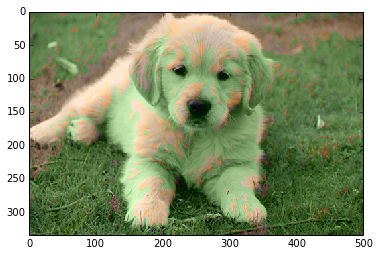

Cluster Centers...
[[ 115.26330935  141.23597122]
 [ 135.17157585  149.90918017]
 [ 101.93207675  160.35914417]
 [ 106.31789713  150.49041564]
 [ 141.30698211  164.62088863]
 [ 131.62        135.22857143]
 [ 138.33410727  156.71232877]
 [ 119.06431274  158.56368222]
 [ 103.87692308  158.69659521]
 [ 134.85199775  142.91896455]
 [ 120.66214689  153.94915254]
 [ 112.52549428  149.84183143]
 [ 129.18518519  158.10092593]
 [ 103.98667538  153.96969301]
 [ 126.41813602  131.03778338]
 [ 140.99574468  160.2751773 ]
 [ 109.93548387  153.78390565]
 [ 109.75806861  146.73977128]
 [ 144.22133863  161.84161696]
 [ 101.07635983  168.94979079]
 [ 147.94885496  159.50229008]
 [ 139.71266735  144.6261586 ]
 [ 131.80892495  147.81135903]
 [ 106.00700264  154.77798186]
 [ 134.84079602  157.34825871]
 [ 135.92458702  152.71534594]
 [ 120.29128857  148.54809437]
 [ 120.70315091  135.45605307]
 [ 107.97310422  151.78670153]
 [ 104.35452586  164.5625    ]
 [ 109.76969242  159.7471868 ]
 [ 108.45473567  148

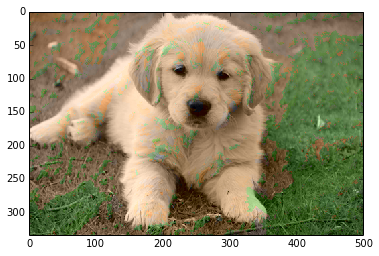

Cluster Centers...
[[ 107.          153.47764787]
 [ 134.66861144  147.35744846]
 [ 134.04025559  156.19233227]
 [ 111.20634921  146.03571429]
 [ 103.10556186  159.5161748 ]
 [ 143.01725998  160.78263215]
 [ 122.99669421  150.91404959]
 [ 126.67713787  130.35951134]
 [ 134.97185501  151.65586354]
 [ 130.81984334  141.00130548]
 [ 108.22645618  150.68862275]
 [ 121.52147239  154.56850716]
 [ 103.5288242   154.59218037]
 [ 141.1730927   153.77522559]
 [ 144.18049793  167.11825726]
 [ 100.04950495  165.32079208]
 [ 138.05096744  156.62576687]
 [ 132.85687732  146.44671623]
 [ 134.91434928  140.18576196]
 [ 108.95789474  162.53894737]
 [ 132.14258912  134.7673546 ]
 [ 128.79082321  157.7705803 ]
 [ 105.60590539  158.94516421]
 [ 104.39584535  152.8355453 ]
 [ 114.34358289  149.76871658]
 [ 144.78017241  154.84626437]
 [ 122.29099307  133.63972286]
 [ 114.89739884  156.3367052 ]
 [ 103.37204574  157.7321474 ]
 [ 139.08720272  147.28765572]
 [ 147.78721279  160.76223776]
 [ 138.64643799  160

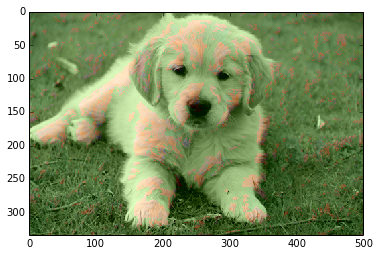

Cluster Centers...
[[ 103.95513598  157.25359432]
 [ 135.84913793  153.41336207]
 [ 136.35066372  144.1659292 ]
 [ 113.65808824  150.80790441]
 [ 128.05555556  135.47619048]
 [ 144.21319797  157.66053299]
 [ 107.          151.        ]
 [ 101.91759657  160.75493562]
 [ 126.59143969  149.192607  ]
 [ 140.17013233  159.15217391]
 [ 124.19575856  157.84013051]
 [ 108.74405145  146.3022508 ]
 [ 127.27335165  129.44230769]
 [ 131.10166799  149.09213662]
 [ 106.          153.43198529]
 [ 128.91849935  156.95601552]
 [ 104.16098485  164.59848485]
 [ 140.03219697  165.57007576]
 [ 131.14455782  142.16156463]
 [ 116.57266436  156.15916955]
 [ 133.52757916  149.39581205]
 [ 114.15727392  146.00131062]
 [ 135.3844697   135.92234848]
 [ 137.4442577   156.16918768]
 [ 106.15365682  156.61322082]
 [ 110.94106464  155.1026616 ]
 [ 103.7224026   153.22077922]
 [ 110.30099633  148.89774515]
 [ 107.63582444  161.08422301]
 [ 143.10817031  154.3716916 ]
 [ 148.66804979  169.23651452]
 [ 138.71017699  147

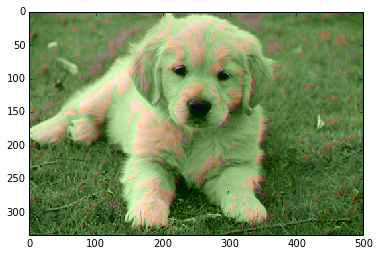

Cluster Centers...
[[ 108.44915254  149.47695975]
 [ 138.42111414  155.54616284]
 [ 133.4492206   146.09730751]
 [ 105.2315957   157.896538  ]
 [ 132.13692946  128.56431535]
 [ 141.29697624  164.91792657]
 [ 121.94230769  150.02307692]
 [ 103.59002023  164.30883345]
 [ 110.16154199  147.98623222]
 [ 129.19302949  138.7922252 ]
 [ 135.02857143  151.00031746]
 [ 143.17631103  159.8363472 ]
 [ 122.59        158.3725    ]
 [ 136.41880342  139.83028083]
 [ 113.73588342  159.75591985]
 [ 104.68243243  152.86036036]
 [ 102.99541284  159.        ]
 [ 117.79494382  138.5252809 ]
 [ 106.76484655  153.69728976]
 [ 130.49920509  158.29888712]
 [ 114.92740472  147.40653358]
 [ 138.20984456  159.46761658]
 [ 131.2362543   144.45876289]
 [ 139.67417417  149.38588589]
 [ 144.74414414  157.51711712]
 [ 134.33486766  155.80897583]
 [ 106.45514706  159.81176471]
 [ 147.25090909  164.72      ]
 [ 129.90714286  132.20238095]
 [ 103.22587543  155.10478482]
 [ 128.70343137  151.42892157]
 [ 134.17178474  148

In [ ]:
for k_i in k:
    for p_i in pc:
        select_hyperparams(k_i,p_i,test_image)

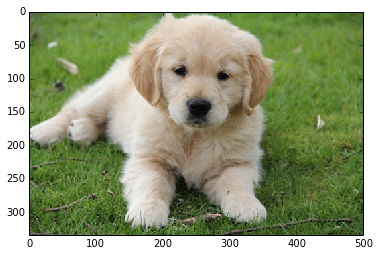

In [5]:
skio.imshow(test_image)
skio.show()